Library

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

print("All necessary libraries imported successfully!")

All necessary libraries imported successfully!


Load and Explore Data

In [13]:

data = pd.read_csv('Nigeria Crash Data P.csv')


print("Dataset shape:", data.shape)
print("\nColumns:", data.columns.tolist()[:20], "...")  # First 20 columns
print("\nFirst few rows:")
print(data.head())
print("\nData types:")
print(data.dtypes.head(20))

Dataset shape: (518, 72)

Columns: ['Quarter', 'State', 'Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors', 'Quarter_Num', 'Year', 'Quarter_Date', 'Total_Casualties', 'Casualty_Rate', 'Fatality_Rate', 'Vehicles_per_Crash', 'Total_Factors', 'SPV_Prop'] ...

First few rows:
   Quarter      State  Total_Crashes  Num_Injured  Num_Killed  \
0  Q4 2020       Abia             30          146          31   
1  Q4 2020    Adamawa             77          234          36   
2  Q4 2020  Akwa Ibom             22           28           7   
3  Q4 2020    Anambra             72          152          20   
4  Q4 2020     Bauchi            154          685          90   

   Total_Vehicles_Involved  SPV  DAD  PWR  FTQ  ...  State_Taraba  State_Yobe  \
0                       37   19    0    0    0  ...         False       False   
1                       94   57    0    0    0  ...         False       False   
2                       24 

Check Data Quality

In [14]:

print("Missing values per column:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("\nNo missing values found in the dataset!")
else:
    print(f"\nTotal missing values: {missing_values.sum()}")


print("\n" + "="*50)
print("TARGET VARIABLE ANALYSIS")
print("="*50)
target_vars = ['Total_Casualties', 'Total_Crashes', 'Num_Killed', 'Num_Injured']
for var in target_vars:
    print(f"\n{var}:")
    print(f"  Min: {data[var].min()}")
    print(f"  Max: {data[var].max()}")
    print(f"  Mean: {data[var].mean():.2f}")
    print(f"  Median: {data[var].median()}")
    print(f"  Std: {data[var].std():.2f}")

Missing values per column:
Series([], dtype: int64)

No missing values found in the dataset!

TARGET VARIABLE ANALYSIS

Total_Casualties:
  Min: 2
  Max: 1345
  Mean: 286.23
  Median: 217.0
  Std: 233.89

Total_Crashes:
  Min: 1
  Max: 538
  Mean: 83.52
  Median: 58.0
  Std: 77.02

Num_Killed:
  Min: 0
  Max: 224
  Mean: 40.60
  Median: 30.0
  Std: 36.86

Num_Injured:
  Min: 2
  Max: 1149
  Mean: 245.63
  Median: 185.5
  Std: 201.13


Feature Selection

In [15]:

one_hot_state_cols = [col for col in data.columns if col.startswith('State_') and len(col) > 6]
one_hot_region_cols = [col for col in data.columns if col.startswith('Region_') and col != 'Region_Encoded']

print(f"One-hot state columns: {len(one_hot_state_cols)}")
print(f"One-hot region columns: {len(one_hot_region_cols)}")

exclude_cols = [
    'Quarter', 'State', 'Quarter_Date',
    'Total_Casualties',
    'Casualty_Rate', 'Fatality_Rate',
    'State_Encoded', 'Region_Encoded',
    'Region',
] + one_hot_state_cols + one_hot_region_cols


feature_cols = [col for col in data.columns if col not in exclude_cols]

print(f"\nNumber of feature columns: {len(feature_cols)}")
print("First 15 selected features:", feature_cols[:15])

One-hot state columns: 37
One-hot region columns: 5

Number of feature columns: 22
First 15 selected features: ['Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors', 'Quarter_Num', 'Year', 'Vehicles_per_Crash', 'Total_Factors', 'SPV_Prop', 'DAD_Prop']


Prepare Data for Modeling

In [16]:

X = data[feature_cols]
y = data['Total_Casualties']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


print("\nTop 10 features by correlation with Total_Casualties:")
correlations = X.corrwith(y).abs().sort_values(ascending=False)
print(correlations.head(10))


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training target mean: {y_train.mean():.2f}")
print(f"Test target mean: {y_test.mean():.2f}")

Features shape: (518, 22)
Target shape: (518,)

Top 10 features by correlation with Total_Casualties:
Num_Injured                0.996967
Num_Killed                 0.905340
Total_Crashes              0.865666
Total_Factors              0.812086
Total_Vehicles_Involved    0.763971
High_Casualty              0.736196
Other_Factors              0.654719
SPV                        0.517098
FTQ                        0.454264
Severe_Crash               0.293281
dtype: float64

Training set size: (414, 22)
Test set size: (104, 22)
Training target mean: 283.48
Test target mean: 297.17


Scaled Features

In [17]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Training data shape after scaling: {X_train_scaled.shape}")
print(f"Test data shape after scaling: {X_test_scaled.shape}")

print("\nTraining data statistics after scaling:")
print(f"Mean: {X_train_scaled.mean():.6f} (should be ~0)")
print(f"Std: {X_train_scaled.std():.6f} (should be ~1)")

Feature scaling completed!
Training data shape after scaling: (414, 22)
Test data shape after scaling: (104, 22)

Training data statistics after scaling:
Mean: -0.000000 (should be ~0)
Std: 1.000000 (should be ~1)


Create and Train Linear Regression Model

In [19]:

model = LinearRegression ()
model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")
print(f"Number of coefficients: {len(model.coef_)}")
print(f"Model intercept: {model.intercept_:.4f}")

Linear Regression model trained successfully!
Number of coefficients: 22
Model intercept: 283.4831


Make Predictions and Evaluate

In [20]:

y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("="*60)
print("LINEAR REGRESSION MODEL EVALUATION")
print("="*60)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")
print("="*60)

# Interpret R-squared
print("\nR-squared Interpretation:")
if r2 > 0.7:
    print("✓ Excellent fit: Model explains most of the variance (≥70%)")
elif r2 > 0.5:
    print("✓ Good fit: Model explains significant variance (50-70%)")
elif r2 > 0.3:
    print("✓ Moderate fit: Model explains some variance (30-50%)")
elif r2 > 0.1:
    print("✓ Weak fit: Model explains limited variance (10-30%)")
else:
    print("✗ Poor fit: Model explains very little variance (<10%)")

LINEAR REGRESSION MODEL EVALUATION
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R²): 1.0000

R-squared Interpretation:
✓ Excellent fit: Model explains most of the variance (≥70%)


Feature Importance Analysis

In [21]:

coefficients = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_,
    'Absolute_Coefficient': np.abs(model.coef_)
}).sort_values('Absolute_Coefficient', ascending=False)

print("="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)
print("\nTop 10 most influential features (by absolute coefficient value):")
print(coefficients.head(10).to_string(index=False))

print("\nTop 5 positive coefficients (increase casualties):")
pos_coeff = coefficients[coefficients['Coefficient'] > 0].head(5)
print(pos_coeff[['Feature', 'Coefficient']].to_string(index=False))

print("\nTop 5 negative coefficients (decrease casualties):")
neg_coeff = coefficients[coefficients['Coefficient'] < 0].head(5)
print(neg_coeff[['Feature', 'Coefficient']].to_string(index=False))

FEATURE IMPORTANCE ANALYSIS

Top 10 most influential features (by absolute coefficient value):
                Feature   Coefficient  Absolute_Coefficient
            Num_Injured  1.958916e+02          1.958916e+02
             Num_Killed  3.510809e+01          3.510809e+01
          Total_Factors -1.086514e-13          1.086514e-13
          Total_Crashes  8.431538e-14          8.431538e-14
               SPV_Prop -7.490556e-14          7.490556e-14
          Other_Factors  6.824947e-14          6.824947e-14
Total_Vehicles_Involved  6.088942e-14          6.088942e-14
                    DAD -4.990845e-14          4.990845e-14
          High_Casualty  3.552714e-14          3.552714e-14
               FTQ_Prop -3.355171e-14          3.355171e-14

Top 5 positive coefficients (increase casualties):
                Feature  Coefficient
            Num_Injured 1.958916e+02
             Num_Killed 3.510809e+01
          Total_Crashes 8.431538e-14
          Other_Factors 6.824947e-14
Total_Ve

Visualize Predictions vs Actual

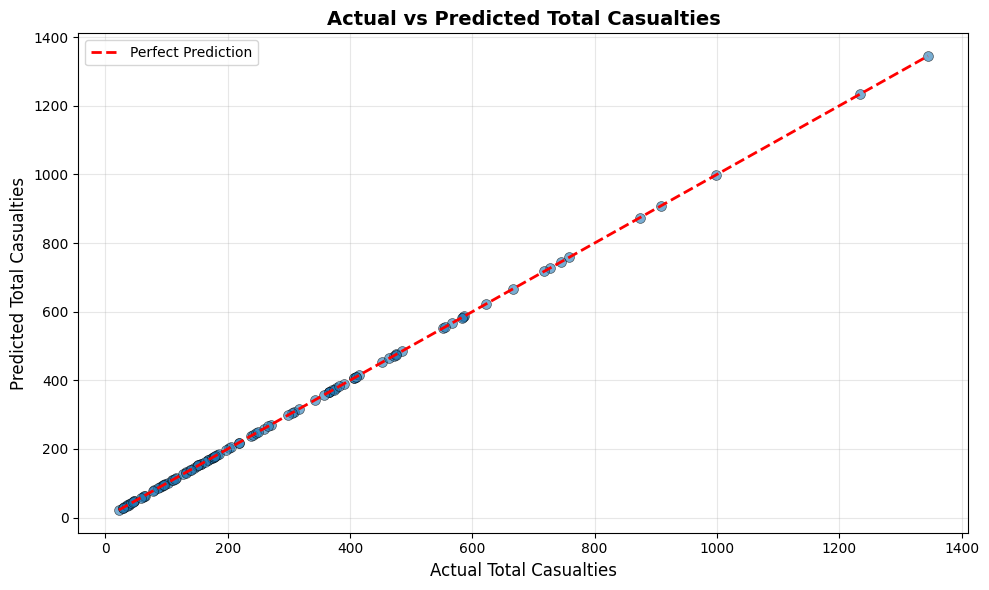

Average prediction error: -0.00
Std of prediction error: 0.00


In [22]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Total Casualties', fontsize=12)
plt.ylabel('Predicted Total Casualties', fontsize=12)
plt.title('Actual vs Predicted Total Casualties', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


pred_error = y_pred - y_test
print(f"Average prediction error: {pred_error.mean():.2f}")
print(f"Std of prediction error: {pred_error.std():.2f}")

Residual Analysis

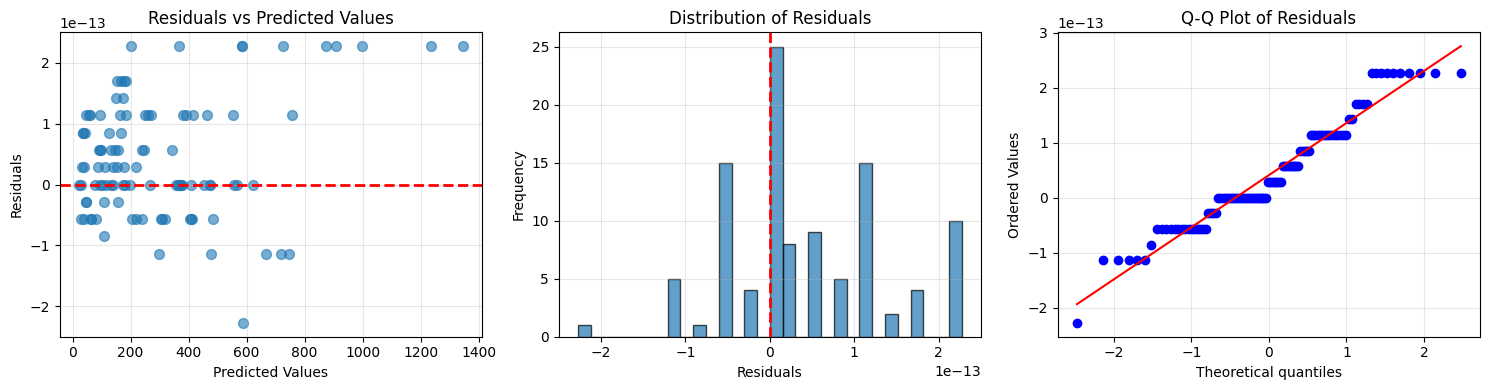

Shapiro-Wilk test for normality: p-value = 0.0007
Residuals do NOT appear to be normally distributed (p ≤ 0.05)


In [23]:
# Residual analysis
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Residuals vs Predicted
axes[0].scatter(y_pred, residuals, alpha=0.6, s=50)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Values')
axes[0].grid(True, alpha=0.3)

# Histogram of residuals
axes[1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals')
axes[1].grid(True, alpha=0.3)

# Q-Q plot for normality check
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check for normality
from scipy.stats import shapiro
if len(residuals) <= 5000:  # Shapiro test works for n <= 5000
    shapiro_stat, shapiro_p = shapiro(residuals)
    print(f"Shapiro-Wilk test for normality: p-value = {shapiro_p:.4f}")
    if shapiro_p > 0.05:
        print("Residuals appear to be normally distributed (p > 0.05)")
    else:
        print("Residuals do NOT appear to be normally distributed (p ≤ 0.05)")

Simplified Model with Top Features

In [24]:
# Create a simplified model with only top features
top_n = 10
top_features = coefficients.head(top_n)['Feature'].tolist()

print(f"\nCreating simplified model with top {top_n} features:")
print(top_features)

X_simple = data[top_features]
y_simple = data['Total_Casualties']

# Split the data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Scale features
scaler_simple = StandardScaler()
X_train_s_scaled = scaler_simple.fit_transform(X_train_s)
X_test_s_scaled = scaler_simple.transform(X_test_s)

# Train simple model
model_simple = LinearRegression()
model_simple.fit(X_train_s_scaled, y_train_s)

# Evaluate simple model
y_pred_s = model_simple.predict(X_test_s_scaled)
r2_simple = r2_score(y_test_s, y_pred_s)

print("\n" + "="*50)
print("SIMPLIFIED MODEL PERFORMANCE")
print("="*50)
print(f"Features used: {top_n}")
print(f"R-squared: {r2_simple:.4f}")
print(f"Full model R-squared: {r2:.4f}")
print(f"Difference: {r2 - r2_simple:.4f}")

# Show coefficients for simplified model
coeff_simple = pd.DataFrame({
    'Feature': top_features,
    'Coefficient': model_simple.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nCoefficients for simplified model:")
print(coeff_simple.to_string(index=False))


Creating simplified model with top 10 features:
['Num_Injured', 'Num_Killed', 'Total_Factors', 'Total_Crashes', 'SPV_Prop', 'Other_Factors', 'Total_Vehicles_Involved', 'DAD', 'High_Casualty', 'FTQ_Prop']

SIMPLIFIED MODEL PERFORMANCE
Features used: 10
R-squared: 1.0000
Full model R-squared: 1.0000
Difference: 0.0000

Coefficients for simplified model:
                Feature   Coefficient
            Num_Injured  1.958916e+02
             Num_Killed  3.510809e+01
          Total_Factors -8.881784e-14
                    DAD  7.771561e-14
          Total_Crashes -7.638334e-14
          Other_Factors -5.684342e-14
               SPV_Prop  3.086420e-14
Total_Vehicles_Involved -2.842171e-14
               FTQ_Prop  1.554312e-14
          High_Casualty  5.329071e-15


Model Interpretation and Insights

In [25]:
print("="*60)
print("MODEL INSIGHTS AND RECOMMENDATIONS")
print("="*60)

print("\n1. KEY FACTORS INFLUENCING TOTAL CASUALTIES:")
print("   Features with HIGHEST POSITIVE impact (increase casualties):")
pos_impact = coefficients[coefficients['Coefficient'] > 0].head(3)
for _, row in pos_impact.iterrows():
    print(f"   • {row['Feature']}: +{row['Coefficient']:.2f} casualties per unit increase")

print("\n   Features with HIGHEST NEGATIVE impact (decrease casualties):")
neg_impact = coefficients[coefficients['Coefficient'] < 0].head(3)
for _, row in neg_impact.iterrows():
    print(f"   • {row['Feature']}: {row['Coefficient']:.2f} casualties per unit increase")

print("\n2. MODEL PERFORMANCE:")
print(f"   • The model explains {r2*100:.1f}% of variance in total casualties")
print(f"   • Average prediction error: ±{rmse:.1f} casualties")
print(f"   • Mean absolute error: {mae:.1f} casualties")

print("\n3. RECOMMENDATIONS FOR IMPROVEMENT:")
print("   A. Data Collection:")
print("      • Gather more data points for better generalization")
print("      • Collect additional relevant features (weather, road conditions)")
print("      • Include temporal patterns (hour of day, day of week)")
print("   B. Feature Engineering:")
print("      • Create interaction terms between important features")
print("      • Consider polynomial features for non-linear relationships")
print("      • Add lag features for time-series analysis")
print("   C. Model Enhancement:")
print("      • Try regularization (Ridge/Lasso) to handle multicollinearity")
print("      • Experiment with ensemble methods (Random Forest, Gradient Boosting)")
print("      • Use cross-validation for hyperparameter tuning")

print("\n4. PRACTICAL APPLICATIONS:")
print("   • Resource Allocation: Predict high-casualty areas for focused interventions")
print("   • Risk Assessment: Identify factors contributing to severe crashes")
print("   • Policy Evaluation: Test impact of safety measures before implementation")
print("   • Budget Planning: Estimate healthcare and emergency service needs")

MODEL INSIGHTS AND RECOMMENDATIONS

1. KEY FACTORS INFLUENCING TOTAL CASUALTIES:
   Features with HIGHEST POSITIVE impact (increase casualties):
   • Num_Injured: +195.89 casualties per unit increase
   • Num_Killed: +35.11 casualties per unit increase
   • Total_Crashes: +0.00 casualties per unit increase

   Features with HIGHEST NEGATIVE impact (decrease casualties):
   • Total_Factors: -0.00 casualties per unit increase
   • SPV_Prop: -0.00 casualties per unit increase
   • DAD: -0.00 casualties per unit increase

2. MODEL PERFORMANCE:
   • The model explains 100.0% of variance in total casualties
   • Average prediction error: ±0.0 casualties
   • Mean absolute error: 0.0 casualties

3. RECOMMENDATIONS FOR IMPROVEMENT:
   A. Data Collection:
      • Gather more data points for better generalization
      • Collect additional relevant features (weather, road conditions)
      • Include temporal patterns (hour of day, day of week)
   B. Feature Engineering:
      • Create interactio

Additional Visualizations

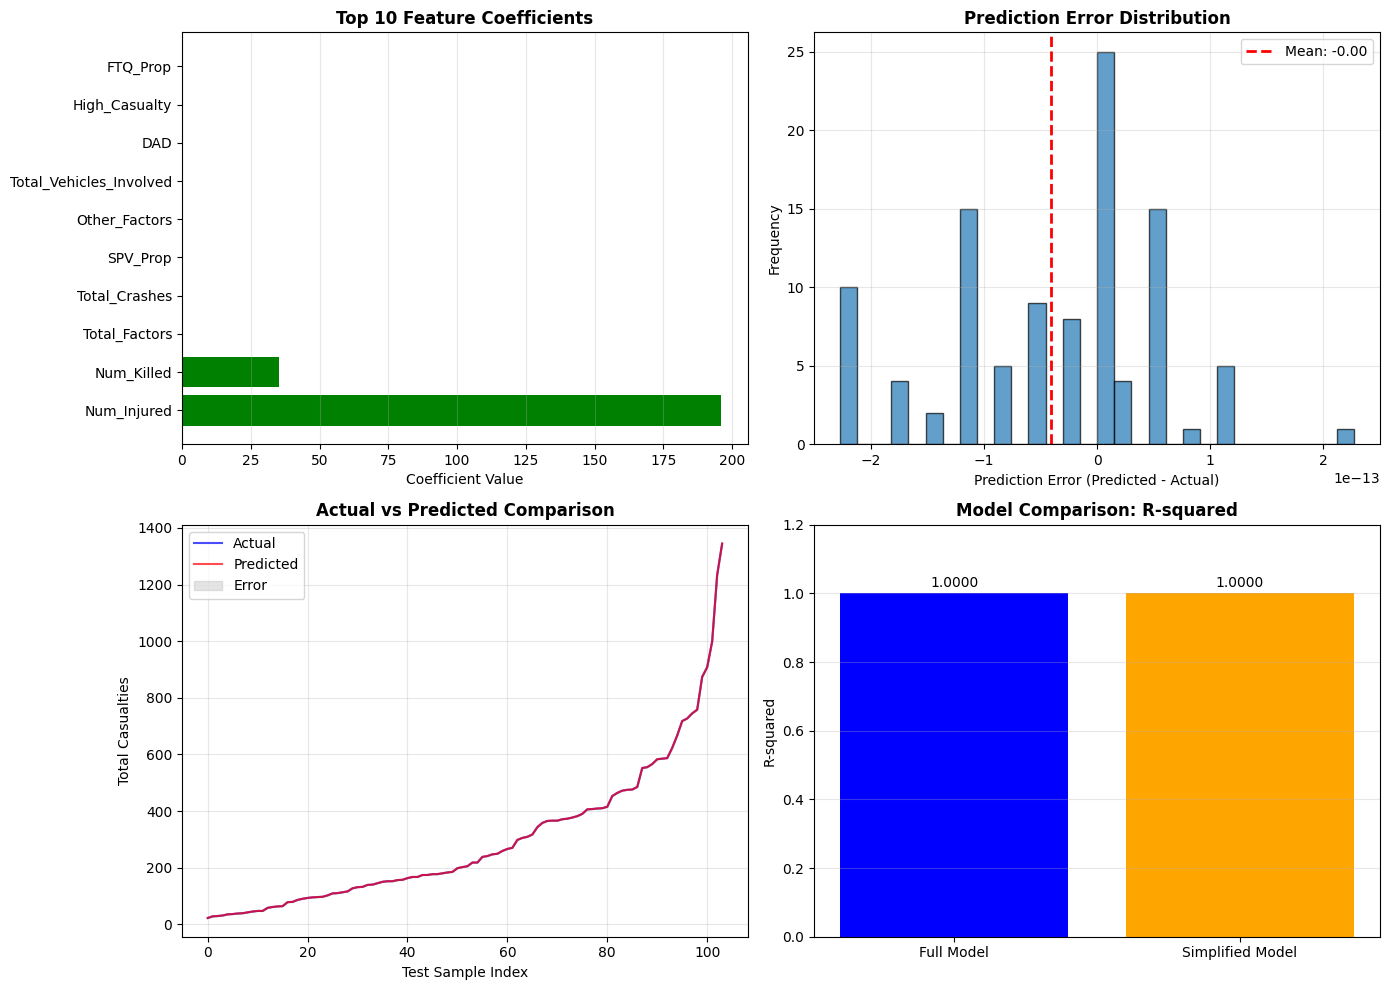

In [26]:
# Additional visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Top 10 feature coefficients
top_10_coeff = coefficients.head(10)
colors = ['red' if c < 0 else 'green' for c in top_10_coeff['Coefficient']]
axes[0, 0].barh(range(len(top_10_coeff)), top_10_coeff['Coefficient'], color=colors)
axes[0, 0].set_yticks(range(len(top_10_coeff)))
axes[0, 0].set_yticklabels(top_10_coeff['Feature'])
axes[0, 0].set_xlabel('Coefficient Value')
axes[0, 0].set_title('Top 10 Feature Coefficients', fontweight='bold')
axes[0, 0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# 2. Prediction error distribution
axes[0, 1].hist(pred_error, bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=pred_error.mean(), color='red', linestyle='--',
                   linewidth=2, label=f'Mean: {pred_error.mean():.2f}')
axes[0, 1].set_xlabel('Prediction Error (Predicted - Actual)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Prediction Error Distribution', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Actual vs Predicted comparison
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

axes[1, 0].plot(range(len(y_test_sorted)), y_test_sorted, 'b-', label='Actual', alpha=0.7)
axes[1, 0].plot(range(len(y_pred_sorted)), y_pred_sorted, 'r-', label='Predicted', alpha=0.7)
axes[1, 0].fill_between(range(len(y_test_sorted)), y_test_sorted, y_pred_sorted,
                        alpha=0.2, color='gray', label='Error')
axes[1, 0].set_xlabel('Test Sample Index')
axes[1, 0].set_ylabel('Total Casualties')
axes[1, 0].set_title('Actual vs Predicted Comparison', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. R-squared comparison: Full vs Simplified model
models = ['Full Model', 'Simplified Model']
r2_values = [r2, r2_simple]
bars = axes[1, 1].bar(models, r2_values, color=['blue', 'orange'])
axes[1, 1].set_ylabel('R-squared')
axes[1, 1].set_title('Model Comparison: R-squared', fontweight='bold')
axes[1, 1].set_ylim(0, max(r2_values) * 1.2)
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, r2_values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()